Import necessary libraries

In [3]:
from matplotlib import pyplot as plt
import pandas as pd

In [4]:
# load rankings data
df_wood = pd.read_csv('data/Golden_Ticket_Award_Winners_Wood.csv')
print(df_wood.head())
# load rankings data
Winners_Steel = pd.read_csv('data/Golden_Ticket_Award_Winners_Steel.csv')

   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3       Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3     4    The Voyage              Holiday World    Santa Claus, Ind.   
4     5   Thunderhead                  Dollywood  Pigeon Forge, Tenn.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        2006    1302          2013  
2  Dinn/PTC-Schmeck        1985    1088          2013  
3     Gravity Group        2006    1086          2013  
4              GCII        2004     923          2013  


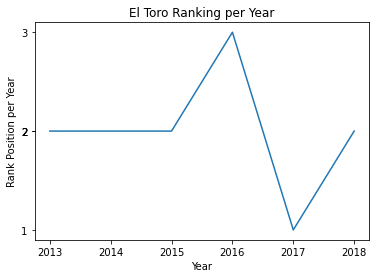

In [5]:
# 2
# Create a function to plot rankings over time for 1 roller coaster
def plot_coaster_ranking(coaster_name, park_name, df):
  ranking_data= df[(df["Name"] == coaster_name) & (df["Park"] == park_name)]
  fig,ax = plt.subplots()
  ax.plot(ranking_data["Year of Rank"], ranking_data["Rank"])
  plt.ylabel("Rank Position per Year")
  plt.xlabel("Year")
  ax.set_xticks(ranking_data["Year of Rank"].values)
  ax.set_yticks(ranking_data["Rank"].values)
  plt.title("{} Ranking per Year" .format(coaster_name))
  plt.show()

# 3
# Create a plot of El Toro ranking over time
plot_coaster_ranking("El Toro", "Six Flags Great Adventure", df_wood)


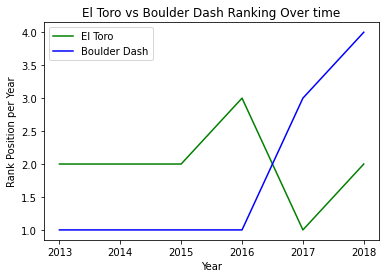

<Figure size 432x288 with 0 Axes>

In [6]:

# Create a plot of El Toro and Boulder dash hurricanes
def plot_two_rankings(roller_1, park_name_1, roller_2, park_name_2, df):
  data_roller1= df[(df["Name"] == roller_1) & (df["Park"] == park_name_1)]
  data_roller2= df[(df["Name"] == roller_2) & (df["Park"] == park_name_2)]
  fig, ax = plt.subplots()
  ax.plot(data_roller1["Year of Rank"], data_roller1["Rank"], color = 'green', label= roller_1)
  ax.plot(data_roller2["Year of Rank"], data_roller2["Rank"], color = 'blue', label= roller_2)
  plt.legend()
  plt.ylabel("Rank Position per Year")
  plt.xlabel("Year")
  plt.title("{} vs {} Ranking Over time" .format(roller_1, roller_2))
  plt.show()
  plt.clf()


plot_two_rankings('El Toro','Six Flags Great Adventure','Boulder Dash','Lake Compounce', df_wood)

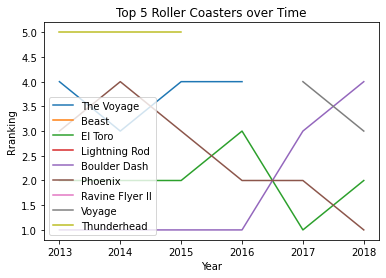

<Figure size 432x288 with 0 Axes>

In [7]:
# Create a function to plot top n rankings over time
def plot_top_ranking(n, df):
  n_ranking = df[df["Rank"] <= n]
  for coaster in set(n_ranking["Name"]):
    coaster_rankings= n_ranking[n_ranking["Name"] == coaster]
    ax= plt.subplot()
    ax.plot(coaster_rankings['Year of Rank'],coaster_rankings['Rank'],label=coaster)
    plt.title("Top {} Roller Coasters over Time" .format(n))
    plt.ylabel("Rranking")
    plt.xlabel("Year")
    ax.legend(loc='lower left')
  plt.show()
  plt.clf()


# Create a plot of top n rankings over time
plot_top_ranking(5, df_wood)

In [8]:
# load roller coaster data
roller_coasters = pd.read_csv("data/roller_coasters.csv")
print(roller_coasters.head())

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  


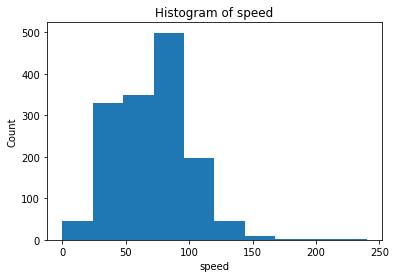

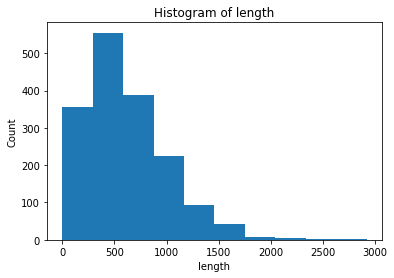

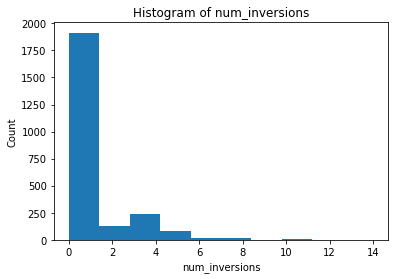

<Figure size 432x288 with 0 Axes>

In [9]:
# Create a function to plot histogram of column values
def plot_column(column, df):
  column_df = df[column].dropna()
  plt.hist(column_df)
  plt.title("Histogram of {}" .format(column))
  plt.ylabel("Count")
  plt.xlabel("{}" .format(column))
  plt.show()
  plt.clf()
# Create histogram of roller coaster speed

plot_column("speed", roller_coasters)
# Create histogram of roller coaster length
plot_column("length", roller_coasters)
# Create histogram of roller coaster number of inversions
plot_column("num_inversions", roller_coasters)


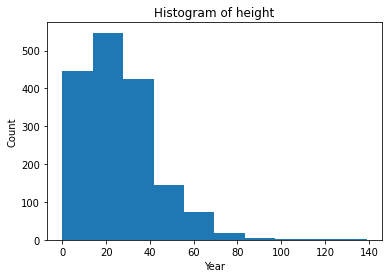

<Figure size 432x288 with 0 Axes>

In [10]:
# Create a function to plot histogram of height values
def plot_height(df):
  heights = roller_coasters[roller_coasters['height'] <= 140]["height"].dropna()
  plt.hist(heights, bins=10)
  plt.title("Histogram of height")
  plt.ylabel("Count")
  plt.xlabel("Year")
  plt.show()
  plt.clf()

# Create a histogram of roller coaster height
plot_height("height")

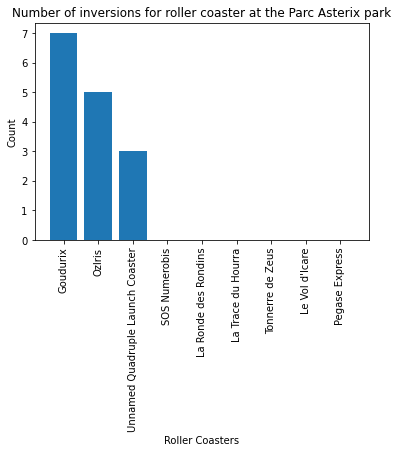

<Figure size 432x288 with 0 Axes>

In [11]:
# Create a function to plot inversions by coaster at park
def inver_roller(park_name, df):
  park_coasters = df[df["park"] == park_name]
  park_coasters = park_coasters.sort_values("num_inversions", ascending=False)
  coaster_names = park_coasters["name"]
  inversions = park_coasters["num_inversions"]
  ax= plt.subplot()
  ax.bar(range(len(inversions)), inversions)
  ax.set_xticks(range(len(inversions)))
  ax.set_xticklabels(coaster_names, rotation=90)
  plt.title("Number of inversions for roller coaster at the {} park" . format(park_name))
  plt.ylabel("Count")
  plt.xlabel("Roller Coasters")
  plt.show()
  plt.clf()


# Create barplot of inversions by roller coasters
inver_roller("Parc Asterix", roller_coasters)

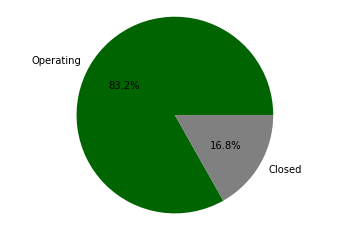

<Figure size 432x288 with 0 Axes>

In [12]:
# Create a function to plot a pie chart of status.operating
def pie_operating(df):
  total = len(df)
  operating= df[df["status"] == "status.operating"]
  closed = df[df["status"] == "status.closed.definitely"]

  operating_counts = len(operating)
  closed_counts = len(closed)

  oper_counts = [operating_counts, closed_counts]
  plt.pie(oper_counts, autopct='%0.1f%%', labels=['Operating','Closed'], colors = ["darkgreen", "grey"])
  plt.axis("Equal")
  plt.show()
  plt.clf()

# Create pie chart of roller coasters
pie_operating(roller_coasters)

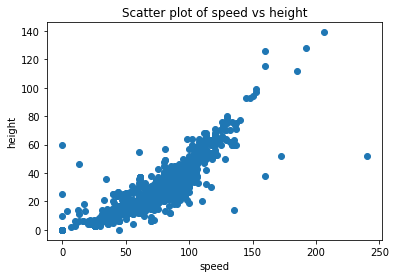

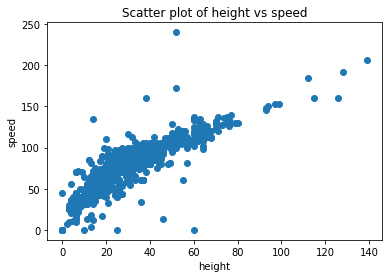

<Figure size 432x288 with 0 Axes>

In [13]:
# 9
# Create a function to plot scatter of any two columns
def scatter(column1, column2, df):
  df = roller_coasters[roller_coasters["height"] <140]
  plt.scatter(df[column1], df[column2])
  plt.title("Scatter plot of {} vs {}" .format(column1, column2))
  plt.ylabel(column2)
  plt.xlabel(column1)
  plt.show()
  plt.clf()

# Create a function to plot scatter of speed vs height
scatter("speed", "height", roller_coasters)

# Create a scatter plot of roller coaster height by speed
scatter("height", "speed", roller_coasters)